# Análisis Exploratorio de Datos (EDA) del SNIIM (Sistema Nacional de información e Integración de Mercados)

Una vez que se ha realizado una limpieza básica a los datos del SNIIM, se procede con el Análisis Exploratorio de Datos.
EDA SNIIM (ver notas de clase)

propiedades por cada variable (pandas profiling)
propiedades por subgrupos de variables
graficas pandas matpolotlib plotlty

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importar librerías

En caso de ser necesario, primero se instala la librería de Ydata-Profiling y la versión requerida de matplotlib, para después importar todas las librerías necesarias.

In [18]:
!pip install -U ydata-profiling[notebook] matplotlib==3.7.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 66.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.8/395.8 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 74.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 87.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=9a8dc46564ccde4608aa4e4334d07fea7845966ab8b3ce2346df554e68db23b6
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e6

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import iqr
import re
from ydata_profiling import ProfileReport


## Carga de los datos

Se carga el dataset del SNIIM que ha sido previamente descargardo y limpiado:

In [2]:
path = "./drive/MyDrive/data/"
#path = "./data/"

# Datos SNIIM
df_sniim_fyh = pd.read_csv(path + "df_sniim_fyh.csv", parse_dates=['fecha'])
df_sniim_fyh.sample(10)


fecha    presentación           origen  \
625119  2021-08-16       Kilogramo           México   
592861  2022-04-05  Caja de 20 kg.          Yucatán   
937809  2020-10-01  Caja de 23 kg.          Sinaloa   
35067   2022-04-07  Caja de 10 kg.  Baja California   
270734  2021-04-13       Kilogramo          Sinaloa   
369424  2022-09-07       Kilogramo          Jalisco   
1282342 2022-12-19  Caja de 10 kg.        Michoacán   
1282201 2022-05-31  Caja de 10 kg.        Michoacán   
613083  2022-11-09       Kilogramo          Nayarit   
267996  2021-05-20       Kilogramo       Guanajuato   

                                                   destino  precio_mín  \
625119     Quintana Roo: Mercado de Chetumal, Quintana Roo       35.00   
592861                 Yucatán: Centro Mayorista Oxkutzcab       25.00   
937809   Sonora: Mercado de Abasto "Francisco I. Madero...       14.35   
35067    Baja California : Central de Abasto INDIA, Tij...       28.30   
270734   Nuevo León: Mercado de Abasto "Estrella" de Sa...       13.00   
369424   Nuevo León: Mercado de Abasto "Estrella" de Sa...       25.00   
1282342     Jalisco: Mercado Felipe Ángeles de Guadalajara       18.00   
1282201     Jalisco: Mercado Felipe Ángeles de Guadalajara       15.00   
613083                      Nayarit: Nayarabastos de Tepic       27.00   
267996               Morelos: Central de Abasto de Cuautla       14.00   

         precio_max  precio_frec observaciones            producto  
625119        35.00        35.00           NaN     Mango Manililla  
592861        25.00        25.00           NaN    Limón s semilla  
937809        16.52        16.52           NaN              Pepino  
35067         28.30        28.30           NaN  Calabacita Criolla  
270734        15.00        15.00           NaN     Chile Jalapeño  
369424        35.00        30.00           NaN       Chile Serrano  
1282342       18.00        18.00           NaN             Guayaba  
1282201       15.00        15.00           NaN             Guayaba  
613083        29.00        28.00           NaN         Mango Indio  
267996        15.00        15.00           NaN     Chile Jalapeño

## Generación de nuevas variables

A partir de los hallazgos encontrados en el EDA, se puede realizar la generación de nuevas variables que puedan ser de interés y que aporten un valor agregado a los datos.

En este caso se realiza lo siguiente:
- Se generan las variables "**estado_destino**" y "**lugar_destino**" a partir de la variable "destino". De esta forma se podrá filtrar la información de los precios por estado y lugar.
- Se crean las variables "**día**", "**mes**" y "**año**" a partir de la variable "fecha" para tener una granularidad más fina y poder hacer las agregaciones necesarias en el futuro.


In [3]:
# Se generan nuevas variables
df_sniim = df_sniim_fyh.copy()

df_split_destino = df_sniim['destino'].str.split(":", expand=True)
df_sniim['estado_destino'] = df_split_destino[0]
df_sniim['lugar_destino'] = df_split_destino[1]

df_sniim['dia'] = df_sniim['fecha'].dt.day
df_sniim['mes'] = df_sniim['fecha'].dt.month
df_sniim['año'] = df_sniim['fecha'].dt.year

# Se reordenan columnas y se crea nuevo df
cols = ['fecha','dia', 'mes', 'año', 'producto', 'precio_mín','precio_max','precio_frec','origen','estado_destino','lugar_destino','destino', 'presentación', 'observaciones']
df_sniim = df_sniim[cols]

df_sniim

fecha  dia  mes   año   producto  precio_mín  precio_max  \
0       2020-01-02    2    1  2020  Berenjena        18.0        20.0   
1       2020-01-03    3    1  2020  Berenjena        18.0        20.0   
2       2020-01-06    6    1  2020  Berenjena        18.0        20.0   
3       2020-01-07    7    1  2020  Berenjena        18.0        20.0   
4       2020-01-08    8    1  2020  Berenjena        18.0        20.0   
...            ...  ...  ...   ...        ...         ...         ...   
1301193 2023-11-06    6   11  2023    Guayaba        22.0        22.0   
1301194 2023-11-07    7   11  2023    Guayaba        22.0        22.0   
1301195 2023-11-08    8   11  2023    Guayaba        22.0        22.0   
1301196 2023-11-09    9   11  2023    Guayaba        22.0        22.0   
1301197 2023-11-10   10   11  2023    Guayaba        22.0        22.0   

         precio_frec     origen  estado_destino  \
0               19.0    Sinaloa  Aguascalientes   
1               19.0    Sinaloa  Aguascalientes   
2               19.0    Sinaloa  Aguascalientes   
3               19.0    Sinaloa  Aguascalientes   
4               19.0    Sinaloa  Aguascalientes   
...              ...        ...             ...   
1301193         22.0  Zacatecas       Zacatecas   
1301194         22.0  Zacatecas       Zacatecas   
1301195         22.0  Zacatecas       Zacatecas   
1301196         22.0  Zacatecas       Zacatecas   
1301197         22.0  Zacatecas       Zacatecas   

                                            lugar_destino  \
0         Centro Comercial Agropecuario de Aguascalientes   
1         Centro Comercial Agropecuario de Aguascalientes   
2         Centro Comercial Agropecuario de Aguascalientes   
3         Centro Comercial Agropecuario de Aguascalientes   
4         Centro Comercial Agropecuario de Aguascalientes   
...                                                   ...   
1301193                    Mercado de Abasto de Zacatecas   
1301194                    Mercado de Abasto de Zacatecas   
1301195                    Mercado de Abasto de Zacatecas   
1301196                    Mercado de Abasto de Zacatecas   
1301197                    Mercado de Abasto de Zacatecas   

                                                   destino    presentación  \
0        Aguascalientes: Centro Comercial Agropecuario ...  Caja de 10 kg.   
1        Aguascalientes: Centro Comercial Agropecuario ...  Caja de 10 kg.   
2        Aguascalientes: Centro Comercial Agropecuario ...  Caja de 10 kg.   
3        Aguascalientes: Centro Comercial Agropecuario ...  Caja de 10 kg.   
4        Aguascalientes: Centro Comercial Agropecuario ...  Caja de 10 kg.   
...                                                    ...             ...   
1301193          Zacatecas: Mercado de Abasto de Zacatecas  Caja de 10 kg.   
1301194          Zacatecas: Mercado de Abasto de Zacatecas  Caja de 10 kg.   
1301195          Zacatecas: Mercado de Abasto de Zacatecas  Caja de 10 kg.   
1301196          Zacatecas: Mercado de Abasto de Zacatecas  Caja de 10 kg.   
1301197          Zacatecas: Mercado de Abasto de Zacatecas  Caja de 10 kg.   

        observaciones  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
...               ...  
1301193           NaN  
1301194           NaN  
1301195           NaN  
1301196           NaN  
1301197           NaN  

[1301198 rows x 14 columns]

## Filtrado de variables

Para este proyecto, es de interés lo siguiente:
 - Sólo aquellos productos cuyo origen es nacional. Es decir, no se tomarán productos de origen extranjero (importación) ya que cuando crucemos estos datos con los del SIAP, la información que tendremos será sólo de cultivos nacionales.

 - ~~Sólo aquellos productos donde la encuesta de precios se haya realizado en los mercados más grandes y que más marcan los precios a nivel nacional. En este caso se trata de los mercados del DF, Nuevo León, Jalisco y Baja California.~~

Se aplican estos filtros y se trabaja con el dataset filtrado.

In [4]:
# Filtro de productos de origen nacional
df_sniim = df_sniim[(df_sniim['origen'] != "Importación") & (df_sniim['origen'] != "Sin Especificar")]
df_sniim

fecha  dia  mes   año   producto  precio_mín  precio_max  \
0       2020-01-02    2    1  2020  Berenjena        18.0        20.0   
1       2020-01-03    3    1  2020  Berenjena        18.0        20.0   
2       2020-01-06    6    1  2020  Berenjena        18.0        20.0   
3       2020-01-07    7    1  2020  Berenjena        18.0        20.0   
4       2020-01-08    8    1  2020  Berenjena        18.0        20.0   
...            ...  ...  ...   ...        ...         ...         ...   
1301193 2023-11-06    6   11  2023    Guayaba        22.0        22.0   
1301194 2023-11-07    7   11  2023    Guayaba        22.0        22.0   
1301195 2023-11-08    8   11  2023    Guayaba        22.0        22.0   
1301196 2023-11-09    9   11  2023    Guayaba        22.0        22.0   
1301197 2023-11-10   10   11  2023    Guayaba        22.0        22.0   

         precio_frec     origen  estado_destino  \
0               19.0    Sinaloa  Aguascalientes   
1               19.0    Sinaloa  Aguascalientes   
2               19.0    Sinaloa  Aguascalientes   
3               19.0    Sinaloa  Aguascalientes   
4               19.0    Sinaloa  Aguascalientes   
...              ...        ...             ...   
1301193         22.0  Zacatecas       Zacatecas   
1301194         22.0  Zacatecas       Zacatecas   
1301195         22.0  Zacatecas       Zacatecas   
1301196         22.0  Zacatecas       Zacatecas   
1301197         22.0  Zacatecas       Zacatecas   

                                            lugar_destino  \
0         Centro Comercial Agropecuario de Aguascalientes   
1         Centro Comercial Agropecuario de Aguascalientes   
2         Centro Comercial Agropecuario de Aguascalientes   
3         Centro Comercial Agropecuario de Aguascalientes   
4         Centro Comercial Agropecuario de Aguascalientes   
...                                                   ...   
1301193                    Mercado de Abasto de Zacatecas   
1301194                    Mercado de Abasto de Zacatecas   
1301195                    Mercado de Abasto de Zacatecas   
1301196                    Mercado de Abasto de Zacatecas   
1301197                    Mercado de Abasto de Zacatecas   

                                                   destino    presentación  \
0        Aguascalientes: Centro Comercial Agropecuario ...  Caja de 10 kg.   
1        Aguascalientes: Centro Comercial Agropecuario ...  Caja de 10 kg.   
2        Aguascalientes: Centro Comercial Agropecuario ...  Caja de 10 kg.   
3        Aguascalientes: Centro Comercial Agropecuario ...  Caja de 10 kg.   
4        Aguascalientes: Centro Comercial Agropecuario ...  Caja de 10 kg.   
...                                                    ...             ...   
1301193          Zacatecas: Mercado de Abasto de Zacatecas  Caja de 10 kg.   
1301194          Zacatecas: Mercado de Abasto de Zacatecas  Caja de 10 kg.   
1301195          Zacatecas: Mercado de Abasto de Zacatecas  Caja de 10 kg.   
1301196          Zacatecas: Mercado de Abasto de Zacatecas  Caja de 10 kg.   
1301197          Zacatecas: Mercado de Abasto de Zacatecas  Caja de 10 kg.   

        observaciones  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
...               ...  
1301193           NaN  
1301194           NaN  
1301195           NaN  
1301196           NaN  
1301197           NaN  

[1196799 rows x 14 columns]

In [ ]:
# Filtro de mercados
#lista_mercados_por_estado = ['DF', 'Nuevo León', 'Jalisco', 'Baja California']
#df_sniim = df_sniim[df_sniim['estado_destino'].isin(lista_mercados_por_estado)]
#df_sniim.sample(5)

## EDA Automatizado: Generación y visualización de reporte usando YData Profiling.

Se utiliza la herramienta de **YData Profiling (antes Pandas Profiling)** para ver rápidamente un EDA básico de los datos.

In [5]:
# Se crea el reporte
profile = ProfileReport(df_sniim, title="EDA básico SNIIM")

# Se visualiza el reporte
profile.to_notebook_iframe()

# Se guarda el reporte en archivo HTML
profile.to_file("reporte_sniim.html")



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Detección de outliers

Los datos que pudieran presentar datos atípicos serían los precios. En este caso la variable de interés es "**precio_frec**".

Se realiza primeramente un histograma y un boxplot para ver la distribución de los datos.


Recordando que estos son precios por kilo de frutas y hortalizas, de hasta \$100 pesos suena hasta cierto punto dentro del rango esperado. Sin embargo se puede ver que el eje de los precios llega hasta \$400.

Text(0, 0.5, 'Cantidad de productos')

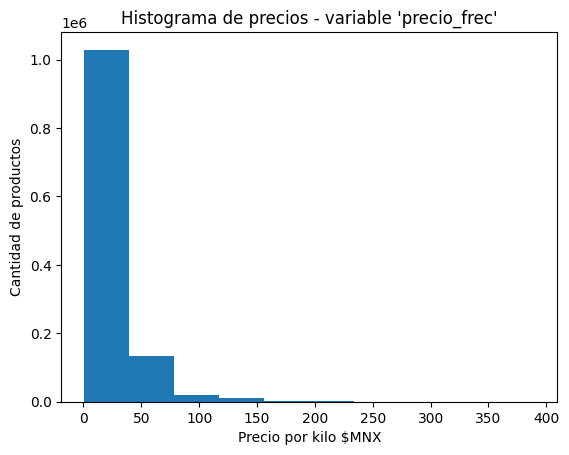

In [30]:
plt.hist(x=df_sniim['precio_frec'])
plt.title("Histograma de precios - variable 'precio_frec'")
plt.xlabel("Precio por kilo $MNX")
plt.ylabel("Cantidad de productos")

Haciendo un poco de "zoom", se revisan los datos donde el precio sea mayor a \$200, donde se puede observar mejor que hay productos que su precio por kilo es incluso mayor de \$350.


Text(0, 0.5, 'Cantidad de productos')

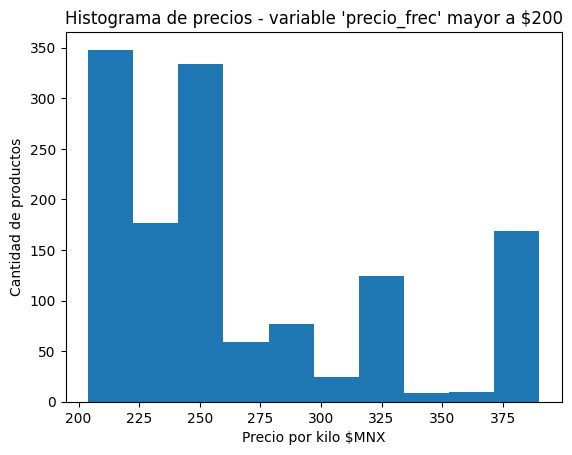

In [36]:
plt.hist(x=df_sniim[df_sniim['precio_frec'] > 200.0]['precio_frec'])
plt.title("Histograma de precios - variable 'precio_frec' mayor a $200")
plt.xlabel("Precio por kilo $MNX")
plt.ylabel("Cantidad de productos")

Revisando más a fondo cuales serían aquellos productos cuyo precio por kilo es mayor a \$200. Se puede observar que la fresa, el chile habanero, la nuez son algunos de los productos que encontramos en este rango. Se sabe que estos son productos de alto precio en el mercado, por lo tanto no se considerarían como datos atípicos.

In [37]:
print(df_sniim[df_sniim['precio_frec'] > 200.0]['producto'].unique())
df_sniim[df_sniim['precio_frec'] > 200.0].sample(5)

['Chile Cat' 'Chile Chilaca' 'Chile de Árbol fresco' 'Chile Dulce'
 'Chile Habanero' 'Fresa' 'Nuez' 'Nuez cáscara de papel'
 'Papaya Amarilla' 'Papaya Maradol']


fecha  dia  mes   año        producto  precio_mín  precio_max  \
878568 2023-02-16   16    2  2023  Papaya Maradol       220.0       220.0   
827558 2020-05-18   18    5  2020            Nuez       256.0       258.0   
229787 2023-11-07    7   11  2023     Chile Dulce       250.0       250.0   
878639 2023-06-02    2    6  2023  Papaya Maradol       220.0       220.0   
827575 2020-04-15   15    4  2020            Nuez       258.0       261.0   

        precio_frec     origen    estado_destino  \
878568        220.0  Michoacán  Baja California    
827558        257.0    Nayarit           Nayarit   
229787        250.0    Yucatán           Yucatán   
878639        220.0  Michoacán  Baja California    
827575        260.0    Nayarit           Nayarit   

                                            lugar_destino  \
878568                   Central de Abasto INDIA, Tijuana   
827558   Mercado de abasto 'Adolfo López Mateos' de Tepic   
229787                        Central de Abasto de Mérida   
878639                   Central de Abasto INDIA, Tijuana   
827575                              Nayarabastos de Tepic   

                                                  destino presentación  \
878568  Baja California : Central de Abasto INDIA, Tij...    Kilogramo   
827558  Nayarit: Mercado de abasto 'Adolfo López Mateo...    Kilogramo   
229787               Yucatán: Central de Abasto de Mérida    Kilogramo   
878639  Baja California : Central de Abasto INDIA, Tij...    Kilogramo   
827575                     Nayarit: Nayarabastos de Tepic    Kilogramo   

       observaciones  
878568           NaN  
827558           NaN  
229787           NaN  
878639           NaN  
827575           NaN

Ahora graficamos un boxplot para ver más sobre los datos.

Rápidamente podemos observar que la media se encuentra alrededor de los \$25, y que tenemos muchos datos que se encuentran por encima del whisker superior.

Comúnmente, estos datos podrían verse como outliers. Sin embargo ya hemos visto que algunas frutas y/o hortalizas (como la nuez) en efecto son productos de precio alto, por lo tanto no consideraremos estos datos como datos atípicos.

Text(0, 0.5, 'Precios por Kg. $MNX')

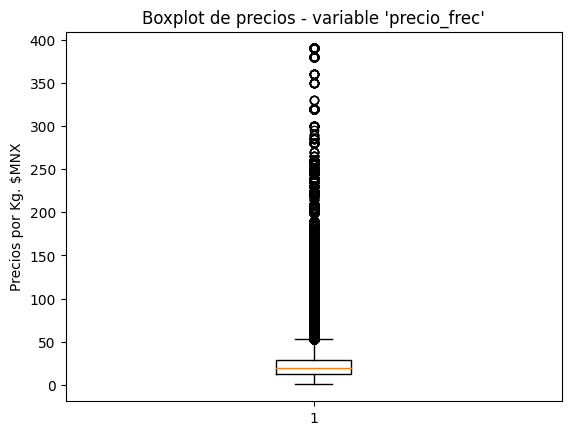

In [38]:
plt.boxplot(x=df_sniim['precio_frec'])
plt.title("Boxplot de precios - variable 'precio_frec'")
plt.ylabel("Precios por Kg. $MNX")

## Transformación de datos para cruzar con datos del SIAP

Como el objetivo de este proyecto es poder ver la relación que existe entre datos del SIAP sobre Producción Agrícola y los precios reportados en SNIIM, se hace necesario realizar varias operaciones como:
- Homologación de nombres de productos sin distición de variedades
- Hologación de nombres de estados
- Agrupación a nivel estatal
- Agrupación a nivel mensual


In [10]:
df_sniim_temp = df_sniim.copy()
df_sniim_temp = df_sniim_temp[['dia','año','mes','estado_destino','producto','precio_frec']]

# Homologar nombres de productos (sin distinguir variedades) a cultivo
df_split_producto = df_sniim_temp['producto'].str.split(" ", expand=True)
df_sniim_temp['cultivo'] = df_split_producto[0]

# Homologar con SIAP
df_sniim_temp['cultivo'] = df_sniim_temp['cultivo'].str.replace("Tomate", "Tomate verde")
df_sniim_temp['cultivo'] = df_sniim_temp['cultivo'].str.replace("Jitomate", "Tomate rojo")
df_sniim_temp['cultivo'] = df_sniim_temp['cultivo'].str.replace("Chile", "Chile verde")

df_sniim_temp['estado_destino'] = df_sniim_temp['estado_destino'].str.replace("México", "Estado de México")
df_sniim_temp['estado_destino'] = df_sniim_temp['estado_destino'].str.replace("DF", "Ciudad de México")
df_sniim_temp['estado_destino'] = df_sniim_temp['estado_destino'].str.strip()

# Se elimina columna
#df_sniim_temp.drop(columns=['producto'], inplace=True)

# Renombrar columnas
df_sniim_temp.rename(columns={"dia":"Día", "mes":"Mes","año": "Año", "estado_destino": "Estado", "cultivo": "Cultivo", "precio_frec": "Precio"}, inplace=True)

# Se seleccionan y reordenan columnas
cols = ['Día', 'Mes', 'Año', 'Estado', 'Cultivo', 'Precio']
df_sniim_temp = df_sniim_temp[cols]

df_sniim_temp

Día  Mes   Año          Estado    Cultivo  Precio
0          2    1  2020  Aguascalientes  Berenjena    19.0
1          3    1  2020  Aguascalientes  Berenjena    19.0
2          6    1  2020  Aguascalientes  Berenjena    19.0
3          7    1  2020  Aguascalientes  Berenjena    19.0
4          8    1  2020  Aguascalientes  Berenjena    19.0
...      ...  ...   ...             ...        ...     ...
1301193    6   11  2023       Zacatecas    Guayaba    22.0
1301194    7   11  2023       Zacatecas    Guayaba    22.0
1301195    8   11  2023       Zacatecas    Guayaba    22.0
1301196    9   11  2023       Zacatecas    Guayaba    22.0
1301197   10   11  2023       Zacatecas    Guayaba    22.0

[1196799 rows x 6 columns]

## Agregación mensual

Los datos del SNIIM son reportados diariamente. Se realiza una **agrupación a nivel mensual** para poder cruzar con otros datasets (como SIAP). Para esto se utiliza la **media** de los **precios frecuentes** reportados.

**NOTA:** La media calculada aquí no coincidirá con la del reporte mensual del SNIIM ya que aquí es calculada como un "promedio estatal" tomando en cuenta el precio del producto (sin distinción de variedades) en todos los mercados/municipios que se tengan por estado. En cambio, en SNIIM calculan el promedio semanal de un producto que proviene de un sólo mercado/municipio y sobre eso calculan de nuevo un promedio.

In [11]:
df_sniim_mensual = df_sniim_temp.groupby(['Año', 'Mes', 'Estado', 'Cultivo'])[['Precio']].mean().reset_index()
df_sniim_mensual


Año  Mes          Estado       Cultivo     Precio
0      2020    1  Aguascalientes     Berenjena  19.681818
1      2020    1  Aguascalientes      Brócoli  12.181818
2      2020    1  Aguascalientes    Calabacita  11.393182
3      2020    1  Aguascalientes       Cebolla   6.795455
4      2020    1  Aguascalientes   Chile verde  15.309659
...     ...  ...             ...           ...        ...
31283  2023   11       Zacatecas       Sandía  12.000000
31284  2023   11       Zacatecas   Tomate rojo  21.142857
31285  2023   11       Zacatecas  Tomate verde  15.571429
31286  2023   11       Zacatecas       Toronja  20.571429
31287  2023   11       Zacatecas           Uva  70.000000

[31288 rows x 5 columns]

In [12]:
df_sniim_mensual['Estado'].unique()

array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Chiapas', 'Chihuahua', 'Ciudad de México', 'Coahuila',
       'Colima', 'Durango', 'Estado de México', 'Guanajuato', 'Guerrero',
       'Hidalgo', 'Jalisco', 'Michoacán', 'Morelos', 'Nayarit',
       'Nuevo León', 'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo',
       'San Luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas',
       'Veracruz', 'Yucatán', 'Zacatecas'], dtype=object)

De esta manera podemos filtrar por fecha y producto:

In [13]:
# Búsqueda específica por fecha y producto
df_sniim_mensual[(df_sniim_mensual['Año']==2023) & (df_sniim_mensual['Mes']==10) & (df_sniim_mensual['Cultivo']=='Guayaba')]

Año  Mes               Estado  Cultivo     Precio
29946  2023   10       Aguascalientes  Guayaba  12.311364
29971  2023   10      Baja California  Guayaba  14.272727
29992  2023   10  Baja California Sur  Guayaba  28.180000
30034  2023   10              Chiapas  Guayaba  24.071429
30053  2023   10            Chihuahua  Guayaba  39.102273
30074  2023   10     Ciudad de México  Guayaba  20.795909
30098  2023   10             Coahuila  Guayaba  21.245455
30119  2023   10               Colima  Guayaba  30.111111
30141  2023   10              Durango  Guayaba  29.809524
30163  2023   10     Estado de México  Guayaba  11.792500
30185  2023   10           Guanajuato  Guayaba  20.181818
30204  2023   10             Guerrero  Guayaba  28.000000
30225  2023   10              Hidalgo  Guayaba  11.540000
30244  2023   10              Jalisco  Guayaba  16.072727
30268  2023   10            Michoacán  Guayaba  25.000000
30291  2023   10              Morelos  Guayaba  14.377778
30316  2023   10              Nayarit  Guayaba  21.684211
30343  2023   10           Nuevo León  Guayaba  10.576364
30367  2023   10               Oaxaca  Guayaba  21.644444
30388  2023   10               Puebla  Guayaba  21.818182
30408  2023   10            Querétaro  Guayaba  11.466667
30430  2023   10         Quintana Roo  Guayaba  30.227273
30452  2023   10      San Luis Potosí  Guayaba  14.000000
30492  2023   10               Sonora  Guayaba  38.980909
30516  2023   10              Tabasco  Guayaba  20.636364
30539  2023   10           Tamaulipas  Guayaba  37.909091
30565  2023   10             Veracruz  Guayaba  24.740000
30590  2023   10              Yucatán  Guayaba  20.256667
30611  2023   10            Zacatecas  Guayaba  23.318182

O filtrar por fecha y estado:

In [14]:
# Búsqueda específica por fecha y estado
df_sniim_mensual[(df_sniim_mensual['Año']==2020) & (df_sniim_mensual['Mes']==1) & (df_sniim_mensual['Estado']=='Ciudad de México')]

Año  Mes            Estado       Cultivo     Precio
126  2020    1  Ciudad de México      Brócoli  12.863636
127  2020    1  Ciudad de México    Calabacita  10.672727
128  2020    1  Ciudad de México       Cebolla  11.465909
129  2020    1  Ciudad de México   Chile verde  18.444000
130  2020    1  Ciudad de México      Coliflor  14.620455
131  2020    1  Ciudad de México       Durazno  19.204091
132  2020    1  Ciudad de México       Guayaba  17.557727
133  2020    1  Ciudad de México       Lechuga   8.618636
134  2020    1  Ciudad de México        Limón   9.215114
135  2020    1  Ciudad de México         Mango  11.240000
136  2020    1  Ciudad de México       Manzana  36.098182
137  2020    1  Ciudad de México        Melón  14.915455
138  2020    1  Ciudad de México       Naranja   7.206061
139  2020    1  Ciudad de México         Nopal   0.911364
140  2020    1  Ciudad de México          Papa  10.227273
141  2020    1  Ciudad de México        Papaya  17.640909
142  2020    1  Ciudad de México        Pepino  15.836364
143  2020    1  Ciudad de México         Piña  28.840909
144  2020    1  Ciudad de México      Plátano  11.425054
145  2020    1  Ciudad de México       Sandía   8.140909
146  2020    1  Ciudad de México   Tomate rojo  23.632273
147  2020    1  Ciudad de México  Tomate verde  16.454545
148  2020    1  Ciudad de México       Toronja  11.663636

También podemos observar, por ejemplo, como ha variado el precio de un producto por año:

In [15]:
df_precio_prod_tiempo = df_sniim_mensual[(df_sniim_mensual['Cultivo'] == 'Calabacita') & (df_sniim_mensual['Estado'] == 'Sonora') & (df_sniim_mensual['Año'] == 2022)]
df_precio_prod_tiempo


Año  Mes  Estado     Cultivo     Precio
16003  2022    1  Sonora  Calabacita  15.556349
16687  2022    2  Sonora  Calabacita  14.461930
17374  2022    3  Sonora  Calabacita  13.549848
18064  2022    4  Sonora  Calabacita  14.230175
18757  2022    5  Sonora  Calabacita  13.141270
19451  2022    6  Sonora  Calabacita  13.736818
20144  2022    7  Sonora  Calabacita  14.964921
20833  2022    8  Sonora  Calabacita  14.231014
21520  2022    9  Sonora  Calabacita  18.218889
22203  2022   10  Sonora  Calabacita  19.819841
22886  2022   11  Sonora  Calabacita  14.606833
23564  2022   12  Sonora  Calabacita  13.365556

Text(0.5, 1.0, "Precio mensual de ['Calabacita'] durante el periodo [2022]")

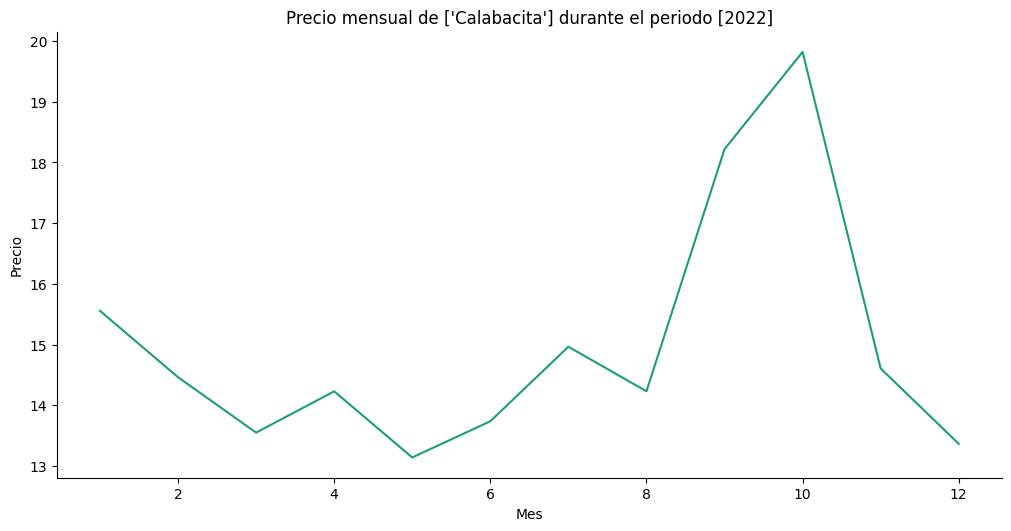

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Mes']
  ys = series['Precio']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_precio_prod_tiempo.sort_values('Mes', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Mes')
_ = plt.ylabel('Precio')
plt.title("Precio mensual de " + str(df_precio_prod_tiempo['Cultivo'].unique()) + " durante el periodo " + str(df_precio_prod_tiempo['Año'].unique()))

Finalmente, aplicamos algunos formatos para facilitar el uso posterior de este dataset, y lo guardamos en formato csv.

In [17]:
# Guardar en formato csv
df_sniim_mensual.to_csv(path + "df_sniim.csv", index=False)

## Trabajo a futuro

El escenario ideal sería que contaramos con la información de los precios a nivel municipio, ya que otras fuentes de información como SIAP se encuentran a nivel municipal.

Sin embargo, el SNIIM sólo se encuentra a nivel estatal. En un primer acercamiento, podríamos **inferir** el nombre del municipio a través del nombre del mercado/centro de abasto de donde se toma el precio. Sin embargo, algunos de estos no incluyen en su nombre el municipio. Para estos casos, se podría asignar la capital del estado, por ejemplo.

Habría que investigar cuál sería la mejor opción y escoger la que nos aporte más a nuestros datos.



Se define la función "inferir_municipio", cuyo objetivo es el de crear una nueva variable "municipio_destino", que contenga el nombre del municipio de donde se toma el precio del producto. Esta información se infiere a partir de la variable "lugar_destino", la cual contiene el nombre del mercado/centro de abasto.


In [ ]:
def inferir_municipio(nombre_lugar, estado):
  #print(nombre_lugar)
  #print(estado)

  # regex
  municipio_re = re.compile(r"""
  (?:de)?
  \s
  (\w+)
  $          # fin de la cadena de texto
  """, re.X)

  match_municipio = re.search(municipio_re, nombre_lugar)

  if match_municipio:
    municipio = match_municipio.group(1)
    #municipio = df_cat_entidad_municipio[(df_cat_entidad_municipio['entidad'] == estado) & (df_cat_entidad_municipio['municipio'].str.contains(mun))]['municipio']

  else:
    municipio = "N/A"
    #municipio = df_cat_entidad_municipio[(df_cat_entidad_municipio['entidad'] == estado) & (df_cat_entidad_municipio['capital'] == True)]['municipio']

  return municipio



df_sniim['municipio_destino'] = df_sniim['lugar_destino'].apply(inferir_municipio, args=(str(df_sniim['estado_destino']),))
df_sniim.sample(10)
